In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
mpl.rcParams['font.size']      = 18
mpl.rcParams['font.weight']    = 'bold'
mpl.rcParams['axes.grid']      = True
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['figure.figsize'] = np.array([15, 8])
mpl.rcParams['axes.xmargin']   = 0

## Load in GOES Data

In [3]:
fname   = 'GOES 15 May 2015-simple.csv'
df_goes = pd.read_csv(fname,comment='#',parse_dates=['datetime'])

In [4]:
df_goes

,datetime,B_AVG
0,2015-05-01 00:00:00,3.720000e-07
1,2015-05-01 00:01:00,3.760000e-07
2,2015-05-01 00:02:00,3.720000e-07
3,2015-05-01 00:03:00,3.740000e-07
4,2015-05-01 00:04:00,3.830000e-07
...,...,...
30970,2015-05-22 14:15:00,5.110000e-07
30971,2015-05-22 14:16:00,5.070000e-07
30972,2015-05-22 14:17:00,5.020000e-07
30973,2015-05-22 14:18:00,5.040000e-07


## Load in Ham Radio Data

In [5]:
fname    = '20150501-20150531-WSPR_RBN_spot_counts.csv'

In [6]:
df    = pd.read_csv(fname,comment='#',parse_dates=['datetime_ut'])

In [7]:
df

,datetime_ut,7MHz-US,14MHz-US,7MHz-Europe,14MHz-Europe
0,2015-05-01 00:00:00,14,93,85,64
1,2015-05-01 00:01:00,7,5,8,19
2,2015-05-01 00:02:00,16,77,92,48
3,2015-05-01 00:03:00,3,5,35,20
4,2015-05-01 00:04:00,8,55,57,24
...,...,...,...,...,...
44635,2015-05-31 23:55:00,69,255,333,170
44636,2015-05-31 23:56:00,78,263,319,140
44637,2015-05-31 23:57:00,87,188,261,151
44638,2015-05-31 23:58:00,72,368,286,150


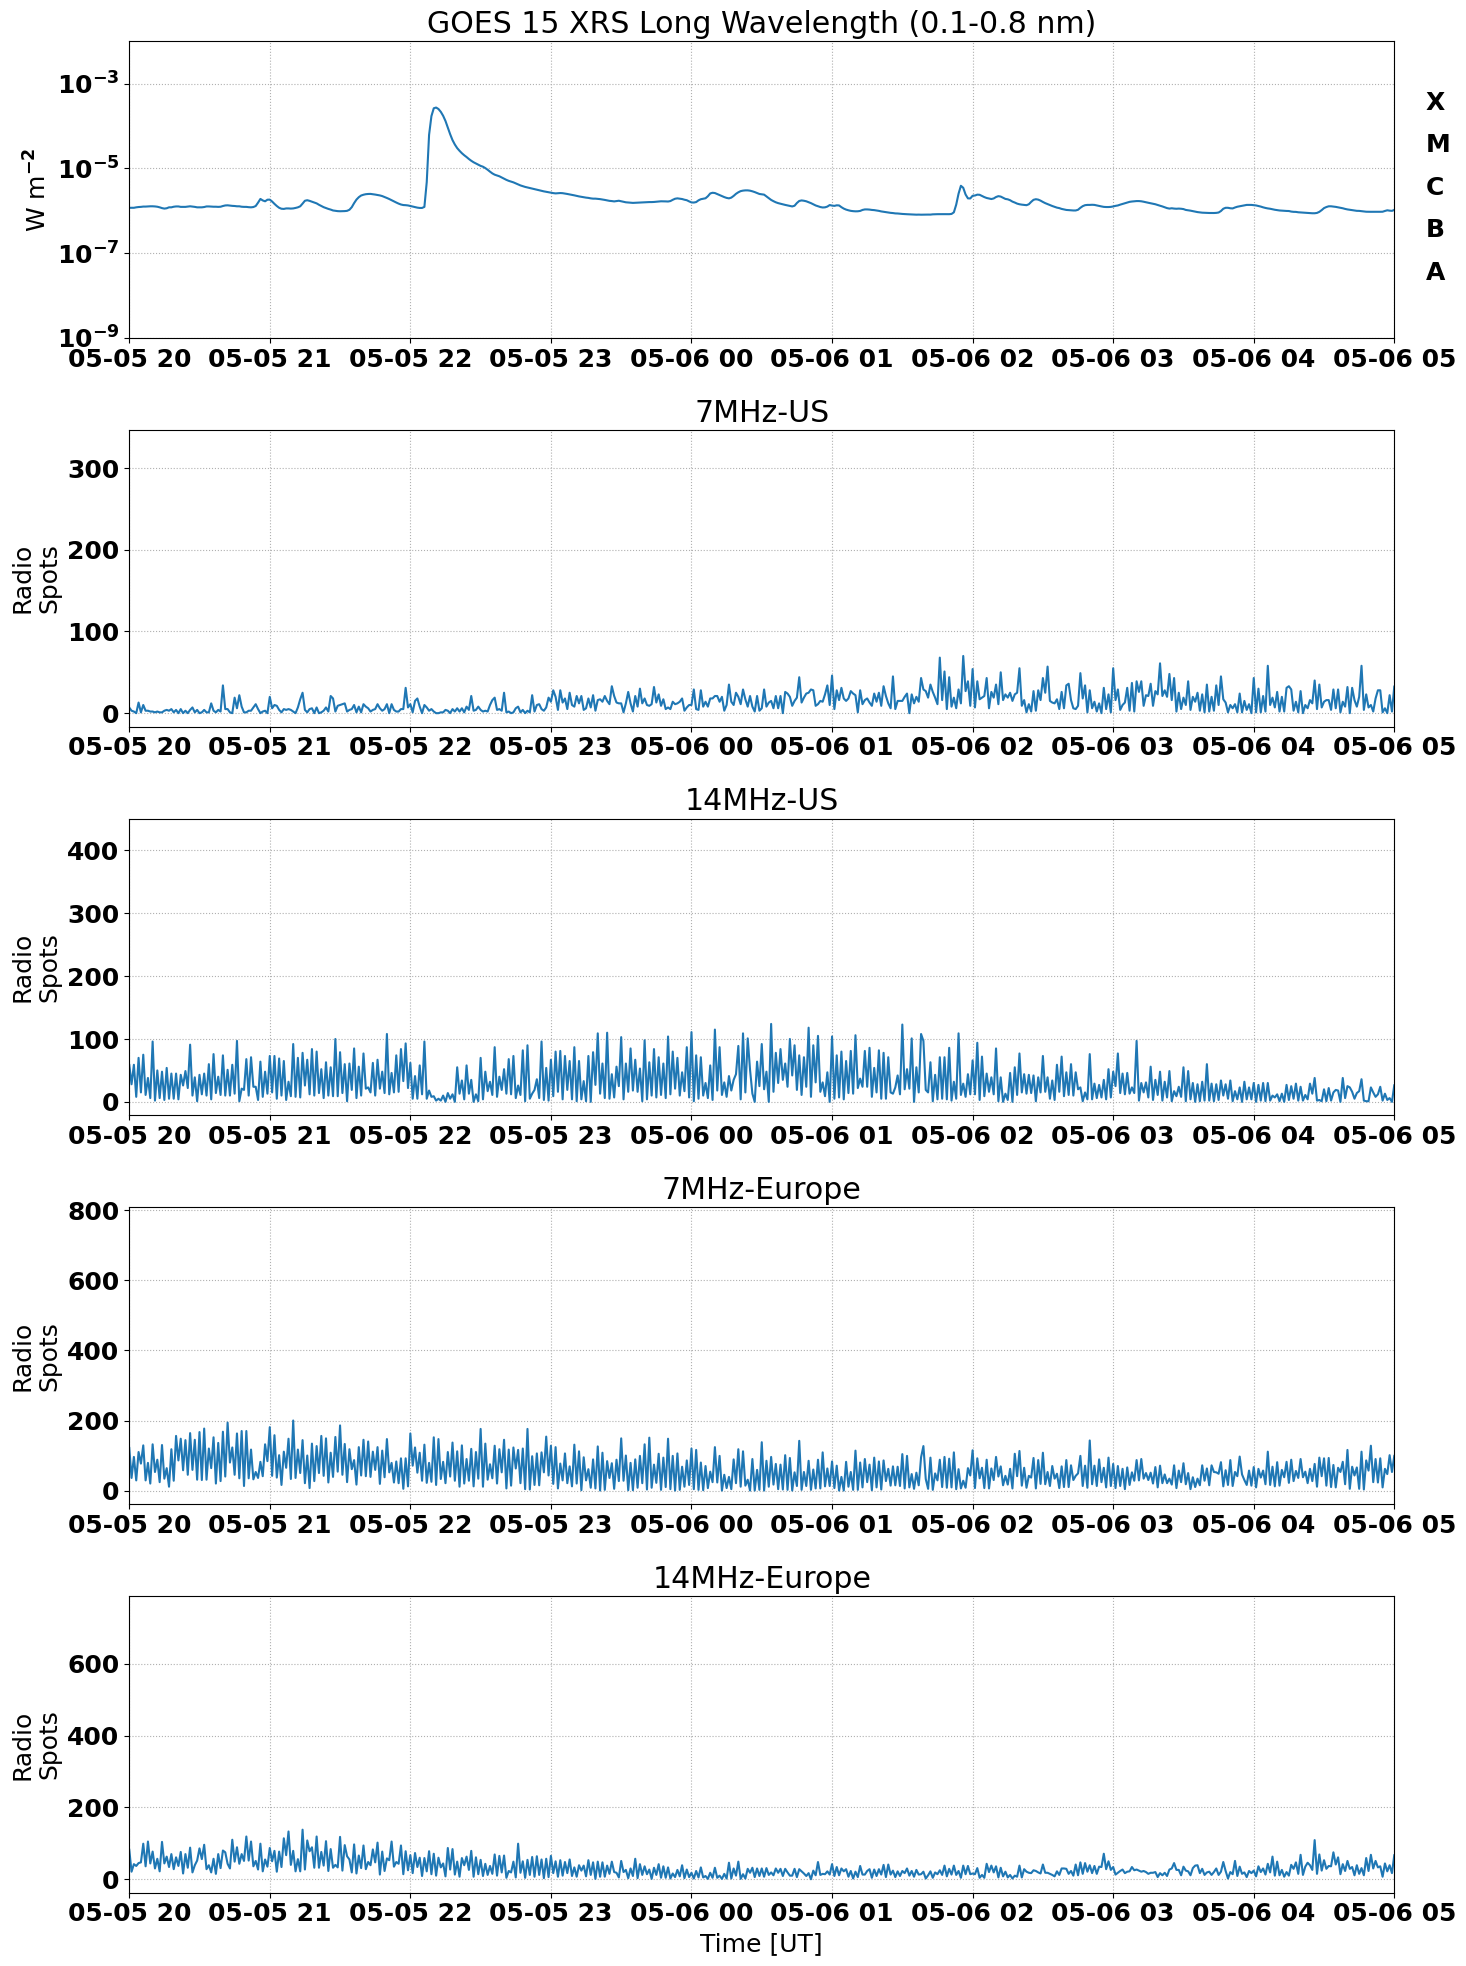

In [8]:
xlim = (datetime.datetime(2015,5,5,20),datetime.datetime(2015,5,6,5))

fig = plt.figure(figsize=(15,20))

ax  = fig.add_subplot(5,1,1)
ax.set_yscale('log')
xx = df_goes['datetime']
yy = df_goes['B_AVG']
ax.plot(xx,yy)
ax.set_xlim(xlim)
ax.set_ylabel('W m$^{-2}$')
ax.set_title('GOES 15 XRS Long Wavelength (0.1-0.8 nm)')

transform = mpl.transforms.blended_transform_factory(ax.transAxes, ax.transData)
ax.text(1.025,3.5e-4,'X',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
ax.text(1.025,3.5e-5,'M',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
ax.text(1.025,3.5e-6,'C',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
ax.text(1.025,3.5e-7,'B',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
ax.text(1.025,3.5e-8,'A',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
ax.set_ylim(1e-9,1e-2)

ax  = fig.add_subplot(5,1,2)
xx  = df['datetime_ut']
key = '7MHz-US'
ax.plot(xx,df[key],label=key)
ax.set_xlim(xlim)
ax.set_ylabel('Radio\nSpots')
ax.set_title(key)

ax  = fig.add_subplot(5,1,3)
xx  = df['datetime_ut']
key = '14MHz-US'
ax.plot(xx,df[key],label=key)
ax.set_xlim(xlim)
ax.set_ylabel('Radio\nSpots')
ax.set_title(key)

ax  = fig.add_subplot(5,1,4)
xx  = df['datetime_ut']
key = '7MHz-Europe'
ax.plot(xx,df[key],label=key)
ax.set_xlim(xlim)
ax.set_ylabel('Radio\nSpots')
ax.set_title(key)

ax  = fig.add_subplot(5,1,5)
xx  = df['datetime_ut']
key = '14MHz-Europe'
ax.plot(xx,df[key],label=key)
ax.set_xlim(xlim)
ax.set_ylabel('Radio\nSpots')
ax.set_title(key)

ax.set_xlabel('Time [UT]')

fig.tight_layout()

plt.show()